Keras: Parameters Tunning, Training, Testing, and more.

     |████████████████████████████████| 13.1MB 7.7MB/s eta 0:00:01    |██████▍                         | 2.6MB 2.6MB/s eta 0:00:05     |█████████████████▉              | 7.3MB 8.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 3.6MB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from math import sqrt, ceil
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

Data loading and preprocessing (preparing for the 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
train_shape = x_train.shape
test_shape = x_test.shape
#Images are 2D. What's the difference in 3D images?
x_train = x_train.reshape(train_shape[0], train_shape[1] * train_shape[2])
x_test = x_test.reshape(test_shape[0], test_shape[1] * test_shape[2])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [3]:
epochs = 50
batch_size = 10
input_size = x_train.shape[1]
first_layer_units = 100
num_classes = 10 
#Each image is handwritten digit belongs to one of 10 classes (0-9), visit: https://goo.gl/gimtcy

Making the model: each layer with neurons numbers (units), activation, use_bias, ....

In [4]:
# Task-1 *Parameters Tunning*
#Tune number of units in each layer
#Tune the activation (sigmoid, relu, tanh, linear, selu, .. visit: https://goo.gl/hdtK15
def model():
    model = Sequential()

    model.add(Dense(units=first_layer_units, input_dim=input_size, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

    model.add(Dense(units=100, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

    model.add(Dropout(0.5))
    model.add(Dense(units=100, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    
    model.add(Dense(units=num_classes, use_bias=True, activation='softmax'))
    #Try to tune the optimizer, visit: https://goo.gl/dHFJNy
    #Try to tune the loss func, visit: https://goo.gl/xMrooU
    #Try to tune learning rate (lr)
    #In your free time take a look at different variations of GD: https://goo.gl/YFa6XY
    sgd_optimizer = SGD(lr=.01)
    adam_optimizer = Adam(lr=.001)
    model.compile(optimizer=adam_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Training and Evaluation on test set.

In [5]:
model = model()
# Task-2 *Early Stopping*
# Add Early stopping, to stop the training when the accuracy doesn't improve after 2 epochs
# and restore the model weights which produced best training accuracy.
callbacks = [EarlyStopping(monitor='val_accuracy', patience=2,restore_best_weights=True)]
# Task-3 *Validation Dataset generation*
# - Split the training dataset {x_train, y_train} to {x_train, y_train} and {x_val, y_val}
#   with ration 80% to 20% respectively.
# - update the early stopping to stop on the validation accuracy.
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, callbacks = callbacks, validation_split=0.2)
loss, acc = model.evaluate(x_test, y_test)
print("Loss:", loss, ", Accuracy:", acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 269us/sample - loss: 0.5365 - accuracy: 0.8350 - val_loss: 0.2374 - val_accuracy: 0.9308
Epoch 2/50
48000/48000 [==============================] - 12s 244us/sample - loss: 0.3817 - accuracy: 0.8823 - val_loss: 0.1647 - val_accuracy: 0.9488
Epoch 3/50
48000/48000 [==============================] - 12s 252us/sample - loss: 0.3033 - accuracy: 0.9071 - val_loss: 0.1379 - val_accuracy: 0.9607
Epoch 4/50
48000/48000 [==============================] - 12s 244us/sample - loss: 0.2639 - accuracy: 0.9184 - val_loss: 0.1177 - val_accuracy: 0.9643
Epoch 5/50
48000/48000 [==============================] - 12s 251us/sample - loss: 0.2390 - accuracy: 0.9268 - val_loss: 0.1203 - val_accuracy: 0.9639
Epoch 6/50
48000/48000 [==============================] - 12s 248us/sample - loss: 0.2195 - accuracy: 0.9330 - val_loss: 0.1056 - val_accuracy: 0.9691
Epoch 7/50
48000/48000 [====================

Loss: 0.08408142212349921 , Accuracy: 0.975


Save the wrights of the model in my_model_weights.hdf5

In [17]:
model.save_weights(filepath="my_model_weights.hdf5")

Weights Visualization of the first layer weights.

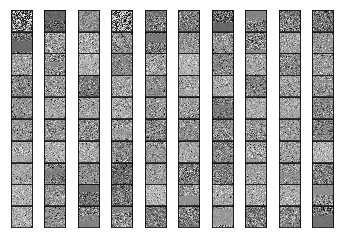

In [18]:
# weights with shape (first_layer_units, 28, 28)
first_layer_params = model.layers[0].get_weights()[0]
first_layer_params = first_layer_params.reshape(first_layer_units,
                                                train_shape[1],
                                                train_shape[2])

plots_per_row = int(ceil(sqrt(first_layer_units)))
fig, axes = plt.subplots(plots_per_row, plots_per_row)

for coef, ax in zip(first_layer_params, axes.ravel()):
    ax.matshow(coef.reshape(train_shape[1], train_shape[2]), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

plt.subplots_adjust(wspace=0, hspace=.03)
plt.show()